In [ ]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# DataLoader
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

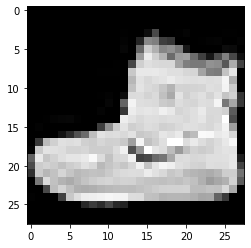

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
# 모델에 데이터 입력하기 전에 1) 255로 나누고 2) 한 줄로 데이터를 펼쳐서 입력
print(X_train.shape)
L, W, H = X_train.shape
X_train = X_train.reshape(-1, H * W) / 255
X_test = X_test.reshape(-1, H * W) / 255
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
# y값 전처리하기...One Hot Encoding
print(y_train[0])
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# model 생성
model = models.Sequential()
model.add(layers.Dense(units=100, activation='relu', input_shape=(W*H, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=50, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
# compile
model.compile('sgd', 'categorical_crossentropy', 'accuracy')

In [ ]:
# fit
model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
480/480 [==============================] - 3s 4ms/step - loss: 1.9246 - accuracy: 0.3128 - val_loss: 0.9483 - val_accuracy: 0.6842
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 1.1408 - accuracy: 0.5843 - val_loss: 0.7693 - val_accuracy: 0.7228
Epoch 3/20
480/480 [==============================] - 2s 3ms/step - loss: 0.9597 - accuracy: 0.6484 - val_loss: 0.6919 - val_accuracy: 0.7532
Epoch 4/20
480/480 [==============================] - 2s 3ms/step - loss: 0.8763 - accuracy: 0.6805 - val_loss: 0.6449 - val_accuracy: 0.7695
Epoch 5/20
480/480 [==============================] - 2s 4ms/step - loss: 0.8091 - accuracy: 0.7113 - val_loss: 0.6069 - val_accuracy: 0.7832
Epoch 6/20
480/480 [==============================] - 2s 4ms/step - loss: 0.7647 - accuracy: 0.7263 - val_loss: 0.5749 - val_accuracy: 0.7993
Epoch 7/20
480/480 [==============================] - 2s 3ms/step - loss: 0.7174 - accuracy: 0.7438 - val_loss: 0.5496 - val_accuracy: 0.8052
Epoch 

In [ ]:
# evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size=100)
print("Loss : {}, Accuracy : {}".format(*model_performance))

100/100 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.8328
Loss : 0.4562785029411316, Accuracy : 0.8327999711036682


In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 2s 4ms/step - loss: 0.5376 - accuracy: 0.8091 - val_loss: 0.4323 - val_accuracy: 0.8433
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 0.5369 - accuracy: 0.8120 - val_loss: 0.4299 - val_accuracy: 0.8436
Epoch 3/50
480/480 [==============================] - 2s 4ms/step - loss: 0.5311 - accuracy: 0.8141 - val_loss: 0.4267 - val_accuracy: 0.8449
Epoch 4/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5246 - accuracy: 0.8164 - val_loss: 0.4226 - val_accuracy: 0.8466
Epoch 5/50
480/480 [==============================] - 2s 4ms/step - loss: 0.5211 - accuracy: 0.8162 - val_loss: 0.4212 - val_accuracy: 0.8453
Epoch 6/50
480/480 [==============================] - 2s 3ms/step - loss: 0.5187 - accuracy: 0.8170 - val_loss: 0.4188 - val_accuracy: 0.8479
Epoch 7/50
480/480 [==============================] - 2s 4ms/step - loss: 0.5148 - accuracy: 0.8208 - val_loss: 0.4149 - val_accuracy: 0.8509
Epoch 

In [ ]:
# 시각화
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

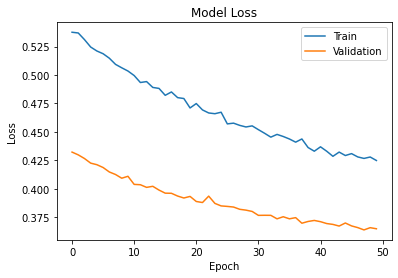

In [ ]:
plot_loss(history)

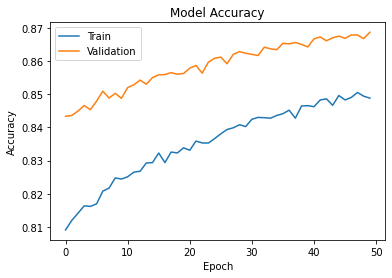

In [ ]:
plot_accuracy(history)

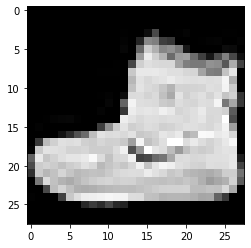

In [ ]:
# 다시 이미지 plotting...reshape 거꾸로
plt.imshow(X_train[0].reshape(28, 28), interpolation='none', cmap='gray')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##############################################
## 지금까지 학습한 weight 값 저장하기
## .hdf5 파일로 저장
##############################################

model.save('C:\encore_lss\model.h5')